#Student Performance - Exploratory Data Analysis (EDA)

## ART308 - Machine Learning  
### Lab 3  

This notebook applies Exploratory Data Analysis (EDA) techniques on the Student Performance dataset to understand patterns, relationships, and key insights affecting student final grades.

##Import Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

##Load Dataset

In [1]:
import pandas as pd

df = pd.read_csv("student-mat.csv", sep=";")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


##Data Structure

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [3]:
df.shape

(395, 33)

In [4]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


##Check Missing Values

In [5]:
df.isnull().sum()

,0
school,0
sex,0
age,0
address,0
famsize,0
Pstatus,0
Medu,0
Fedu,0
Mjob,0
Fjob,0


###There are no missing values in the dataset. All features are complete.

##Remove Duplicates

In [6]:
df.duplicated().sum()

np.int64(0)

#Visualizations

##Distribution of Final Grades

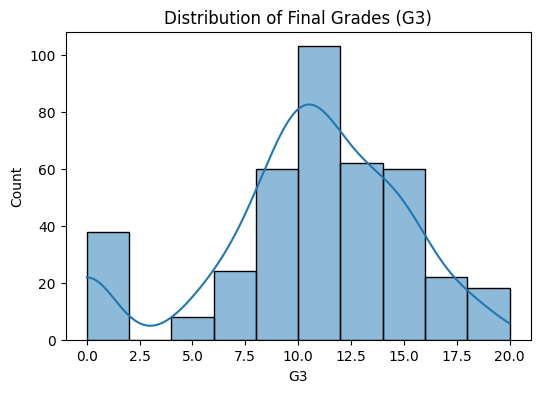

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.histplot(df['G3'], bins=10, kde=True)
plt.title("Distribution of Final Grades (G3)")
plt.show()

The distribution of final grades (G3) appears approximately normal, with most students scoring between 8 and 15. Very few students achieved extremely low or very high grades.

##Study Time vs Final Grade

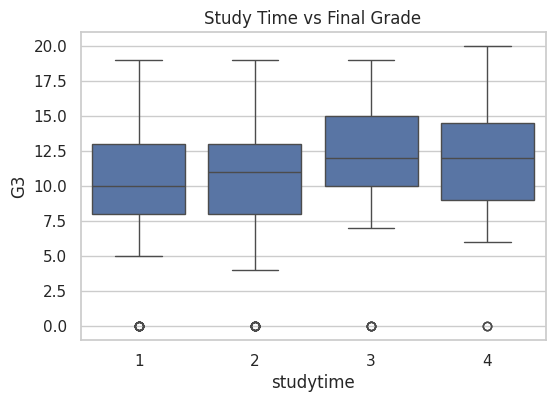

In [12]:
plt.figure(figsize=(6,4))
sns.boxplot(x='studytime', y='G3', data=df)
plt.title("Study Time vs Final Grade")
plt.show()

Students with higher study time tend to achieve slightly better grades

#Gender vs Final Grade

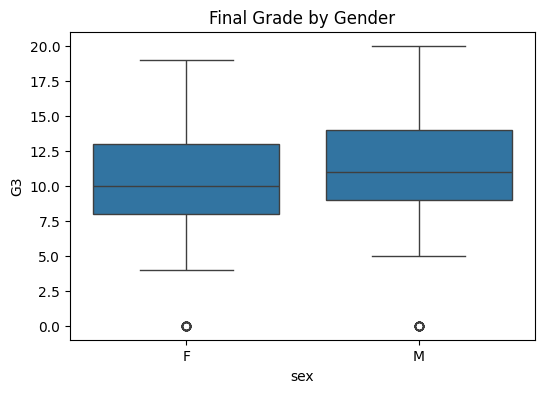

In [8]:
plt.figure(figsize=(6,4))
sns.boxplot(x='sex', y='G3', data=df)
plt.title("Final Grade by Gender")
plt.show()

The boxplot shows a slight difference between male and female students. However, the median grades are relatively similar, indicating that gender may not strongly influence final performance.

#Absences vs Final Grade

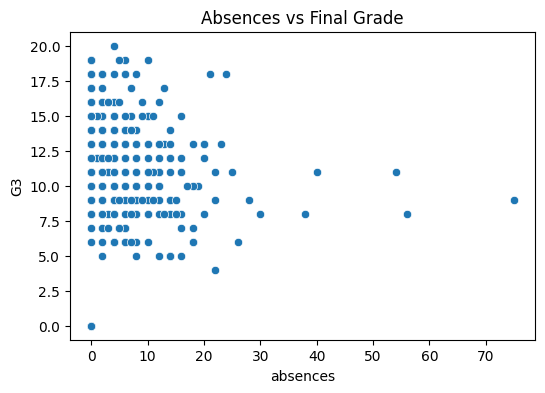

In [9]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='absences', y='G3', data=df)
plt.title("Absences vs Final Grade")
plt.show()

The scatterplot suggests a weak negative relationship between absences and final grades. Students with higher absences tend to have slightly lower performance.

##Relationship between G1, G2, G3

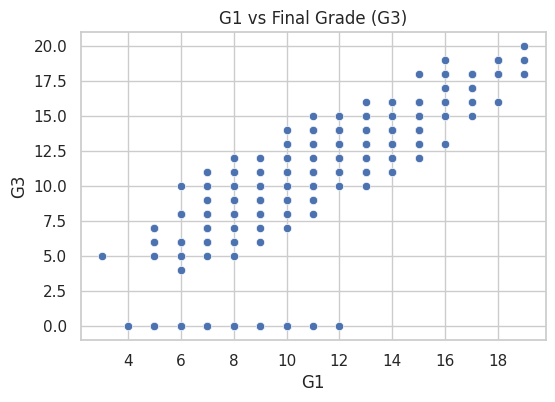

In [14]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='G1', y='G3', data=df)
plt.title("G1 vs Final Grade (G3)")
plt.show()

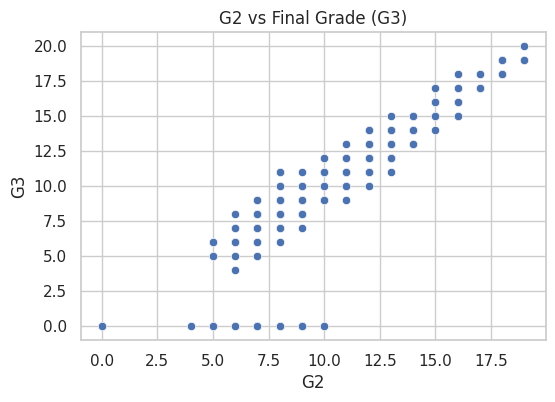

In [15]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='G2', y='G3', data=df)
plt.title("G2 vs Final Grade (G3)")
plt.show()

Previous grades (G1 and G2) strongly predict the final grade (G3).

#Correlation Matrix

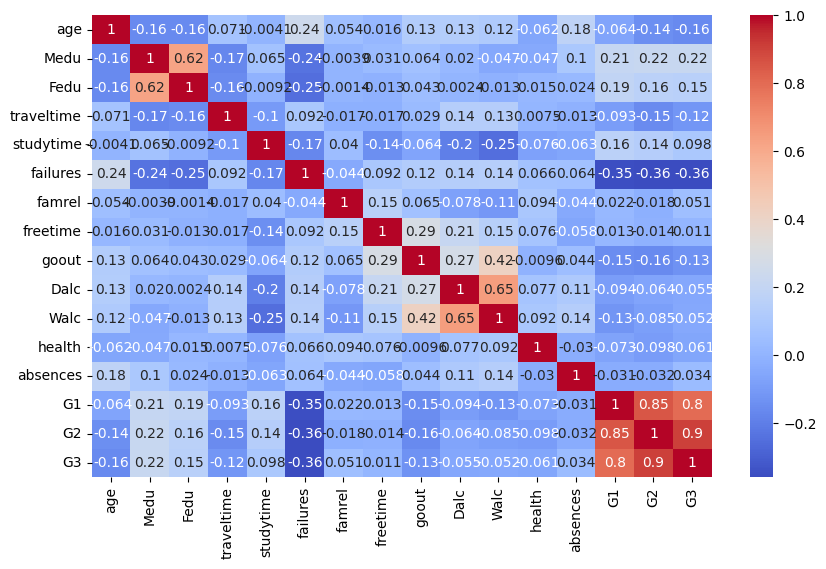

In [10]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

Strong positive correlations are observed between G1, G2, and G3, indicating that previous grades strongly influence final performance. Other variables show weak correlations.

# Final Insights

- Previous grades (G1, G2) strongly influence final grade (G3).
- Absences slightly reduce student performance.
- Gender has minimal impact on final results.
- Most students perform within a moderate grade range.

This analysis provides useful insights for understanding academic performance patterns.